In [47]:
import numpy as np

### 1
Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [48]:
a = np.random.randn(10,3)
print(a)

[[-0.58686601 -1.50934005  1.55267523]
 [ 0.19167769 -1.31788081 -1.4400451 ]
 [-0.98839849  0.7382388  -1.27404241]
 [-1.04370242  1.88294713  0.89113137]
 [-0.16700678 -1.93549017  0.43544167]
 [-0.20961515  0.46706436 -0.08066264]
 [-0.99414099  0.20218695  0.53953304]
 [-0.51343529  0.18653524  0.10319183]
 [-0.31126117  0.24269722 -1.0942328 ]
 [ 0.64314016 -1.46764945  0.82366485]]


In [49]:
print(a[np.arange(10),np.argmin(abs(a-0.5), axis=1)])

[1.55267523 0.19167769 0.7382388  0.89113137 0.43544167 0.46706436
 0.53953304 0.18653524 0.24269722 0.64314016]


### 2
Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [50]:
a = np.random.randn(6,6)
print(a)

[[ 1.11618794 -2.36089464  0.09387981 -0.4055523   1.80617128  0.00262964]
 [ 0.05066777 -0.39646079 -1.25491947 -0.05508883 -0.62933459 -0.62598169]
 [ 0.95444799  0.77422513 -0.77431379 -0.66043177  0.25265523  0.3910316 ]
 [-1.32000456  0.81182244  0.42144115  0.57457172  1.09715899 -1.96459606]
 [ 1.94596866 -0.09585792 -0.51071471  0.67679073 -0.28465841  0.40808003]
 [-0.45903762 -1.77199789 -0.84041457  0.24792819 -0.81274535  1.94410894]]


In [51]:
b = np.argmin(a, axis = 0)
print(sum(a[np.arange(6)])/a[b[np.arange(6)],np.arange(6)])

[-1.73350172  1.28729323  2.28304816 -0.57268252 -1.7585424  -0.0790353 ]


### 3
На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [52]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
print(np.max(x[mask[(np.arange(len(x))+1) % len(x)]]))

7


### 4
Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [56]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength=len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


### 5
Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

In [57]:
def findind(Data, centers):
    return np.vectorize(lambda i: np.argmin(np.apply_along_axis(lambda c: np.linalg.norm(Data[i] - c), 1, centers)))(np.arange(Data.shape[0]))   
def findmean(Data, centers, ind):
    return sum(np.apply_along_axis(np.linalg.norm, 0, Data - centers[ind]))
def findcenter(Data,ind,k):
    return np.vectorize(lambda i: np.sum(Data[ind == i]) / (Data[ind == i].shape[0]))(np.arange(k))
def kmeans(Data, k_or_guess,eps = 0.001):
    centers = np.array([])
    k = 0
    if (isinstance(k_or_guess, int) or isinstance(k_or_guess, np.int32)):
        centers = Data[np.random.randint(0, Data.shape[0], k_or_guess)]
        k = k_or_guess
    else:
        centers = Data[k_or_guess]
        k = k_or_guess.shape[0]
        
    ind = findind(Data, centers)
    old_mean = findmean(Data, centers, ind)
    mean = old_mean
    
    while abs(mean - old_mean) > eps:
        old_mean = mean
        centers = findcenter(Data,ind,k)
        ind = findind(Data, centers)
        mean = findmean(Data, centers, ind)
        
    return (centers, mean)

### 6
С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [59]:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 2:] = data[:, 2:].astype(int)

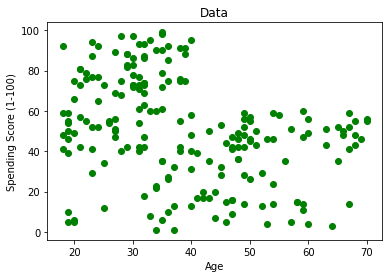

In [60]:
plt.scatter(data[:, 2], data[:, 4], c='g')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Data")
plt.show()

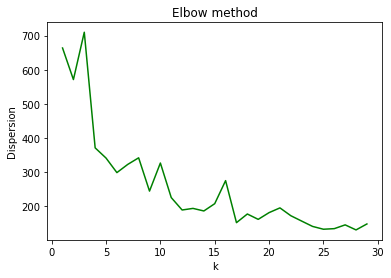

In [61]:
based_data = np.array([data[:, 2], data[:, 4]]).T
elbow = np.vectorize(lambda k: kmeans(based_data, k)[1])(np.arange(1, 30))
plt.plot(np.arange(1, 30), elbow,'g')
plt.xlabel("k")
plt.ylabel("Dispersion")
plt.title("Elbow method")
plt.show()

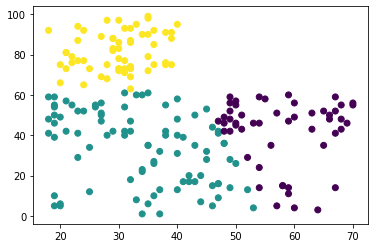

In [80]:
centers_income = kmeans(based_data, 3)[0]
res = findind(based_data, centers_income)
plt.scatter(based_data[:, 0], based_data[:, 1], c = res)
plt.show()

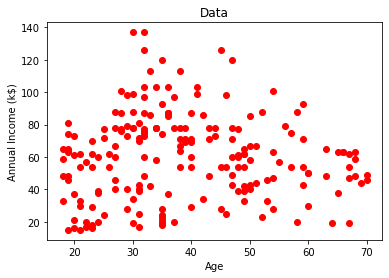

In [81]:
plt.scatter(data[:, 2], data[:, 3], c='r')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Data")
plt.show()

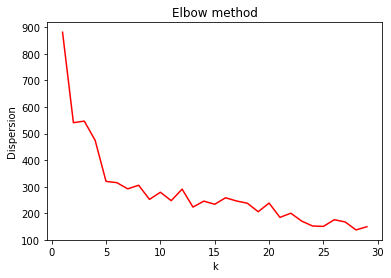

In [82]:
based_data = np.array([data[:, 2], data[:, 3]]).T
elbow = np.vectorize(lambda k: kmeans(based_data, k)[1])(np.arange(1, 30))
plt.plot(np.arange(1, 30), elbow,'r')
plt.xlabel("k")
plt.ylabel("Dispersion")
plt.title("Elbow method")
plt.show()

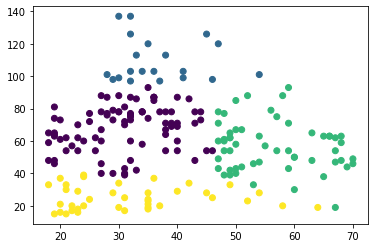

In [87]:
centers_income = kmeans(based_data, 4)[0]
res = findind(based_data, centers_income)
plt.scatter(based_data[:, 0], based_data[:, 1], c = res)
plt.show()